Prachi Patil (CDAC-Silchar: PG-DAI)

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from numpy import loadtxt


In [ ]:
import tensorflow as tf


In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras.utils.np_utils

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
import os
print(os.getcwd())


/content


In [21]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

In [22]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [23]:
x = dataset[:,0:8]
y = dataset[:,8]

In [25]:
X_scaled = scale(x)
print('scaled_X: \n ', x_scaled)

scaled_X: 
  [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [26]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42)


In [33]:
# one Hot encoding 
y_train = np_utils.to_categorical(y_train)


In [34]:
print('y_train encoded : ' , y_train)

y_train encoded :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [39]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))


In [41]:
model.add(Dense(8, activation = "relu"))

In [42]:
model.add(Dense(2, activation="softmax"))


In [45]:
model.compile(loss ="binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])


fit keras models on the datasets

In [49]:
history = model.fit(X_train, y_train, validation_split = 0.33, epochs =150, batch_size =10)

Epoch 1/150
35/35 [==============================] - 1s 10ms/step - loss: 0.7224 - accuracy: 0.3779 - val_loss: 0.6957 - val_accuracy: 0.5118
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5930 - val_loss: 0.6655 - val_accuracy: 0.6118
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6221 - val_loss: 0.6385 - val_accuracy: 0.6353
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6628 - val_loss: 0.6135 - val_accuracy: 0.6588
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.6948 - val_loss: 0.5893 - val_accuracy: 0.6706
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7035 - val_loss: 0.5664 - val_accuracy: 0.6765
Epoch 7/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5472 - accuracy: 0.7326 - val_loss: 0.5485 - val_accuracy: 0.6824
Epoch 8/150


evaluating keras model

In [50]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: % 2f' %(accuracy*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8230
Accuracy:  82.295722


In [51]:
modelPredictions = np.argmax(model.predict(X_test), axis =-1)

8/8 [==============================] - 0s 2ms/step


In [52]:
#summary of first 10 cases
for i in range(10):
  print("%s == %d(expected %d)" % (X_test[i].tolist(), modelPredictions[i],y[i]))

[0.6399472601593618, -0.7165334717264664, -0.5741277459136239, 0.7818138030884967, 0.956859653030945, 0.2547804694892943, -0.1264714020604746, 0.8303811324799336] == 0(expected 1)
[-0.5479185907225473, -0.2783734371474431, 0.30473400231574344, 0.7190857419965655, -0.6928905722954664, 0.47054318659717476, -0.9781448690748636, -1.0415494364835027] == 0(expected 0)
[-0.5479185907225473, -0.4035620184557355, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -0.1513611156549505, -0.9479436823013037, -1.0415494364835027] == 0(expected 1)
[1.233880185600316, -0.4348591637828086, 0.5632227517949692, -1.2882122129452327, -0.6928905722954664, -0.9382604368719248, 1.1600991544931767, 0.06459135426761878] == 0(expected 0)
[0.9369137228798391, 0.4727580507023112, 1.0802002507534205, -1.2882122129452327, -0.6928905722954664, -0.26558843647676966, -0.7908975110787921, 1.4259954044228451] == 0(expected 1)
[0.6399472601593618, -0.560047745091101, 0.149640752628208, 0.7190857419965655, 0.95

In [63]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
accuracy_score(y_test, y_pred)

8/8 [==============================] - 0s 3ms/step


0.6850393700787402

In [54]:
print(model.metrics_names)

['loss', 'accuracy']


In [55]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


summarize history for loss

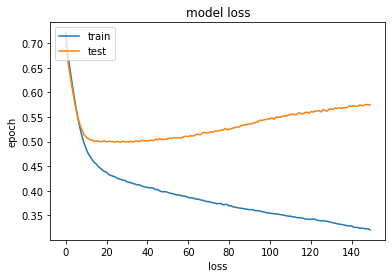

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel('epoch')
plt.legend(['train',"test"], loc= "upper left")
plt.show()

summarize history for accuracy

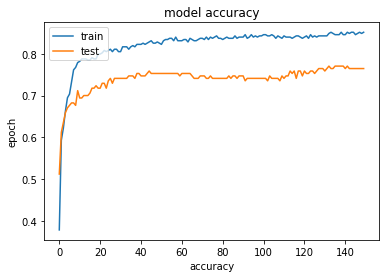

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel('epoch')
plt.legend(['train',"test"], loc= "upper left")
plt.show()